# Elena Lorite Acosta

# Importing the dataset

In [ ]:
# To import the dataset into the code
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
#print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

display(X)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


# **Basic level**
## First step: Review and revise the dataset

This step will review each feature (e.g. numerical/categorical, unknown values, etc.), calculate the imbalance of the target variable ('readmitted') to determine the hit percentage of a trivial system.

Revise and adapt each variable data type for a correct classification (e.g.: detect which variables apparently numerical are not numerical because they have text strings, eliminate or transform these samples, convert the columns into numerical ones, etc.).

### 1. Review Features


*   **Inspect Data Types**: Determine whether each column is numerical or categorical. Check for columns that are mistakenly treated as numerical due to string values.
*  **Check for Missing/Unknown Values**: Identify any missing, null, or placeholder values (e.g., "?" or "Unknown") and decide how to handle them (imputation or removal).



In [ ]:
import numpy as np
import pandas as pd
import sklearn
import statistics

# Inspect dataset structure
print(X.info())  # Summary of data types and non-null counts
print('\n')
X.describe(include='all') # Summary of statistics and unique values for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Check for missing or placeholder values
print('Count of missing values\n')
print(X.isnull().sum())  # Count of missing values per column

Count of missing values

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# Detect unique values to identify categorical variables
print('Unique values:\n')
for col in X.columns:
    print(f"{col}: {X[col].unique()[:10]}")  # Display first few unique values per column

Unique values:

HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21]
Smoker: [1 0]
Stroke: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
MentHlth: [18  0 30  3  5 15 10  6 20  2]
PhysHlth: [15  0 30  2 14 28  7 20  3 10]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]


#### **Review of the data**
There is no missing values in dataset, furthermore, all features have values that match what they represent, so there is no need to modify the dataset.

### 2. Check Target Variable (Imbalance)

* Analyze the distribution of the target variable (y) to identify class imbalance.
* Compute the trivial system's hit percentage, which is the percentage of the most common class.

In [ ]:
# Review target distribution
target_distribution = y.value_counts(normalize=True) * 100  # Class percentages
print('Target variable distribution:')
print(target_distribution)

# Calculate trivial system hit percentage (% of most common class)
trivial_hit_rate = max(target_distribution)
most_common_class = y.value_counts().idxmax()  # Class label with the highest count
print(f'\nTrivial system hit percentage: {trivial_hit_rate:.2f}%')
print(f'Corresponding to class {most_common_class[0]}')

Target variable distribution:
Diabetes_binary
0                  86.066698
1                  13.933302
Name: proportion, dtype: float64

Trivial system hit percentage: 86.07%
Corresponding to class 0


#### **Class Imbalance**
Clearly there is class imbalance as there are way more instances of class 0 (healthy) than class 1 (diabetes or prediabetic). We need to take this into account and perform oversampling or undersampling during the training phase of the models.

## Second step: Basic metric to obtain the value of the area under the ROC curve (AUC)

The base classifier `sklearn.dummy.DummyClassifier()` will be used to obtain the value AUC (area under the curve (ROC)). A few different classifiers will be applied to the base (`DummyClassifier`) to analyze them.

The value for AUC ranges from 0 to 1. A model that has an AUC of 1 is able to perfectly classify observations into classes while a model that has an AUC of 0.5 does no better than a model that performs random guessing. The higher the AUC value the better while an AUC score of 0.5 is no better than a model that performs random guessing.

### 1. Select some classifiers

This will be used to compared them against the baseline classifier. Specifically, this classifiers will be used:
* **Logistic Regression**: A linear classifier.
* **Random Forest**: A tree-based ensemble method.

As there is class imbalance, it is necessary to introduce oversampling/undersampling in the training phase. In this case the class imbalance was addressed by setting `class_weight` parameter to `balanced` when calling `LogisticRegression` and `RandomForest`. This parameter assigns higher weights to the minority class and lower weights to the majority class during training.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
import timeit

# Define StratifiedKFold with 10 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dummy Classifier (baseline)
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
start_time = timeit.default_timer()
dummy_auc = cross_val_score(dummy_clf, X, y, cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for Dummy (s): {elapsed}")
print(f"DummyClassifier AUC (mean): {dummy_auc.mean():.4f}, Std: {dummy_auc.std():.4f}")

Processing Time for Dummy (s): 0.5795774190000884
DummyClassifier AUC (mean): 0.5000, Std: 0.0000


In [ ]:
from sklearn.linear_model import LogisticRegression
import timeit

# Logistic Regression
logreg_clf = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42)
start_time = timeit.default_timer()
logreg_auc = cross_val_score(logreg_clf, X, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for Logistic Regression (s): {elapsed}")
print(f"Logistic Regression AUC (mean): {logreg_auc.mean():.4f}, Std: {logreg_auc.std():.4f}")

Processing Time for Logistic Regression (s): 148.38014796100003
Logistic Regression AUC (mean): 0.8225, Std: 0.0041


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import timeit
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, class_weight='balanced', random_state=42)
start_time = timeit.default_timer()
rf_auc = cross_val_score(rf_clf, X, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for Random Forest (s): {elapsed}")
print(f"Random Forest AUC (mean): {rf_auc.mean():.4f}, Std: {rf_auc.std():.4f}")

Processing Time for Random Forest (s): 301.18411053499995
Random Forest AUC (mean): 0.8042, Std: 0.0038


### 2. Review of Logic Regression and Random Forest classifiers
With the previous parameters, the AUC values obtained were:
* Logistic Regression AUC (mean) = 0.8225
* Random Forest AUC (mean) = 0.8042

This values are much better than the one obtained by the baseline classifier (0.5). The parameters were tuned by hand, so probably searching for optimal parameters automatically could improve de AUC score. This will be done in the Advanced Section.

# **Intermediate Level**
## First Step: Apply more classifiers
In the basic level we only applied 2 classifiers (apart from the baseline). In this section 3 more classifiers will be applied.
* Bagging Classifier
* Gradient Boosting Classifier
* K-Nearest Neighbors Classifier (kNN)



In [ ]:
from sklearn.ensemble import BaggingClassifier
import timeit

# Bagging Classifier
bag_clf = BaggingClassifier(n_estimators=100, max_samples=0.8, max_features=1.0, random_state=42)
start_time = timeit.default_timer()
bag_auc = cross_val_score(bag_clf, X, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for Bagging (s): {elapsed}")
print(f"Bagging AUC (mean): {bag_auc.mean():.4f}, Std: {bag_auc.std():.4f}")

Processing Time for Bagging (s): 892.8087966579997
Bagging AUC (mean): 0.7894, Std: 0.0043


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import timeit

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
start_time = timeit.default_timer()
gb_auc = cross_val_score(gb_clf, X, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for Gradient Boosting (s): {elapsed}")
print(f"Gradient Boosting AUC (mean): {gb_auc.mean():.4f}, Std: {gb_auc.std():.4f}")


Processing Time for Gradient Boosting (s): 497.36958993999997
Gradient Boosting AUC (mean): 0.8304, Std: 0.0040


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import timeit

# kNN
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
start_time = timeit.default_timer()
knn_auc = cross_val_score(knn_clf, X, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for kNN (s): {elapsed}")
print(f"KNN AUC (mean): {knn_auc.mean():.4f}, Std: {knn_auc.std():.4f}")


Processing Time for kNN (s): 1325.8644981769994
KNN AUC (mean): 0.7509, Std: 0.0043


With the previous parameters, the AUC values obtained were:
* Bagging AUC (mean) = 0.7894
* Gradient Boosting Classifier AUC (mean) = 0.8304
* KNeighbors Classifier AUC (mean) = 0.7504

This values are again better than the one obtained by the baseline classifier (0.5). After applying 5 classifiers, seems like **Logistic Regression**, **Random Forest** and **Gradient Boosting** are the best ones. As The other classifiers take too long to train, only the best ones will be tested in the future.

Automatic parameter tuning will be performed in the Advanced level to ensure that the classifier get the maximum AUC value possible.

## Second step: Automatic Feature Selection
### 1. Select and Apply the Algorithms
Automatic feature selection helps identify the most important features in the dataset, which can improve model performance, reduce overfitting, and speed up training. In this subsection an algorithm for automatic feature selection will be tested, and then classification will be performed after that to see if results improve.

To select features automatically, two different methods will be used:
* **Tree-Based model** (Random Forest).
* **Recursive Feature Elimination** (RFE).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train Random Forest to determine feature importance
rf_selector = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_selector.fit(X, y.values.ravel())

# Get feature importance scores
rf_feature_importances = rf_selector.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Select top 12 features
rf_top_features = rf_importance_df.head(12)['Feature'].values
X_rf_reduced = X[rf_top_features]   # Reduced dataset
print("Top Features Selected:", rf_top_features)


Top Features Selected: ['BMI' 'Age' 'GenHlth' 'Income' 'HighBP' 'PhysHlth' 'Education' 'MentHlth'
 'HighChol' 'Fruits' 'Smoker' 'DiffWalk']


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg_selector = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Apply RFE - Select top 12 features
rfe = RFE(estimator=logreg_selector, n_features_to_select=12)
X_rfe = pd.DataFrame(rfe.fit_transform(X, y.values.ravel()))  # Reduced dataset

# Check selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features.tolist())


Selected Features:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


### 2. Perform Classification on the Reduced Dataset
Now that we have the reduced dataset (X_rf_reduced and X_rfe), the classifiers (created previously) will be reapplied to evaluate their performance.

In [ ]:
import timeit
# Logistic Regression - logreg_clf
start_time = timeit.default_timer()
rf_logreg_auc = cross_val_score(logreg_clf, X_rf_reduced, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for rf_logreg: {elapsed}")

start_time = timeit.default_timer()
rfe_logreg_auc = cross_val_score(logreg_clf, X_rfe, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for rfe_logreg: {elapsed}")

# Random Forest - rf_clf
start_time = timeit.default_timer()
rf_rf_auc = cross_val_score(rf_clf, X_rf_reduced, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for rf_rf: {elapsed}")

start_time = timeit.default_timer()
rfe_rf_auc = cross_val_score(rf_clf, X_rfe, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for rfe_rf: {elapsed}")

# Gradient Boosting - gb_clf
start_time = timeit.default_timer()
rf_gb_auc = cross_val_score(gb_clf, X_rf_reduced, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for rf_gb: {elapsed}")

start_time = timeit.default_timer()
rfe_gb_auc = cross_val_score(gb_clf, X_rfe, y.values.ravel(), cv=skf, scoring='roc_auc')
elapsed = timeit.default_timer() - start_time
print(f"Processing Time for rfe_gb: {elapsed}")



Processing Time for rf_logreg: 47.699662052999884
Processing Time for rfe_logreg: 42.01541215900011
Processing Time for rf_rf: 260.3657626060001
Processing Time for rfe_rf: 212.52121583400003
Processing Time for rf_gb: 396.37547326899994
Processing Time for rfe_gb: 430.2169590430003

Method:				 RF | RFE
Logistic Regression AUC: 0.8174 | 0.8221
Random Forest AUC:	 0.7902 | 0.7803
Gradient Boosting AUC:	 0.8247 | 0.8295


In [ ]:
# Print results
print("\nMethod:\t\t\t     RF | RFE")
print(f"Logistic Regression AUC: {rf_logreg_auc.mean():.4f} | {rfe_logreg_auc.mean():.4f}")
print(f"Random Forest AUC:\t {rf_rf_auc.mean():.4f} | {rfe_rf_auc.mean():.4f}")
print(f"Gradient Boosting AUC:\t {rf_gb_auc.mean():.4f} | {rfe_gb_auc.mean():.4f}")


Method:			     RF | RFE
Logistic Regression AUC: 0.8174 | 0.8221
Random Forest AUC:	 0.7902 | 0.7803
Gradient Boosting AUC:	 0.8247 | 0.8295


### Third Step: Comparison of results (Wilcoxon signed-rank test)

In [ ]:
from scipy.stats import wilcoxon

# Perform test for logreg
logreg_wilcox_W, logreg_p_value =  wilcoxon(rf_logreg_auc, rfe_logreg_auc, correction=True)
print('Results of the Wilcoxon test for logreg')
print(f'Wilcox W: {logreg_wilcox_W}, p-value: {logreg_p_value:.4f}')

# Perform test for rf
rf_wilcox_W, rf_p_value =  wilcoxon(rf_rf_auc, rfe_rf_auc, correction=True)
print('Results of the Wilcoxon test for rf')
print(f'Wilcox W: {rf_wilcox_W}, p-value: {rf_p_value:.4f}')

# Perform test for gb
gb_wilcox_W, gb_p_value =  wilcoxon(rf_gb_auc, rfe_gb_auc, correction=True)
print('Results of the Wilcoxon test for gb')
print(f'Wilcox W: {gb_wilcox_W}, p-value: {gb_p_value:.4f}')

Results of the Wilcoxon test for logreg
Wilcox W: 0.0, p-value: 0.0020
Results of the Wilcoxon test for rf
Wilcox W: 0.0, p-value: 0.0020
Results of the Wilcoxon test for gb
Wilcox W: 0.0, p-value: 0.0020


The p-value being less than 0.05 suggest that the test has identified a statistically significant difference between the two methods. To see which method is better the parameter `alternative` can be set to 'greater'.

In [ ]:
# Perform test for logreg
logreg_wilcox_W, logreg_p_value =  wilcoxon(rf_logreg_auc, rfe_logreg_auc, alternative='greater', correction=True)
print('Results of the Wilcoxon test for logreg')
print(f'Wilcox W: {logreg_wilcox_W}, p-value: {logreg_p_value:.4f}')

# Perform test for rf
rf_wilcox_W, rf_p_value =  wilcoxon(rf_rf_auc, rfe_rf_auc, alternative='greater', correction=True)
print('Results of the Wilcoxon test for rf')
print(f'Wilcox W: {rf_wilcox_W}, p-value: {rf_p_value:.4f}')

# Perform test for gb
gb_wilcox_W, gb_p_value =  wilcoxon(rf_gb_auc, rfe_gb_auc, alternative='greater', correction=True)
print('Results of the Wilcoxon test for gb')
print(f'Wilcox W: {gb_wilcox_W}, p-value: {gb_p_value:.4f}')

Results of the Wilcoxon test for logreg
Wilcox W: 0.0, p-value: 1.0000
Results of the Wilcoxon test for rf
Wilcox W: 55.0, p-value: 0.0010
Results of the Wilcoxon test for gb
Wilcox W: 0.0, p-value: 1.0000


Now the p-values are 1.0 for Logistic Regression and Gradient Boosting and 0.001 for Random Forest. This indicates that the Tree-Based Feature Selection method is only better than RFE in the case of the Random Forest classifier. Observing the AUC means, this is corroborated.

**RFE** seems to get better results, so this is the method that will be used for future tests.

# **Advanced Level**
## First Step: Automatic hiperparameter tuning
In previous sections, the classifiers where tuned by hand. This takes too much time and effort, and probably the parameters aren't optimal. This is what automatic parameter tuning algorithms are for. The method used in this case is from `scikit-learn`:
* **Random Search**. It samples various hyperparameters from a distribution.

The classifiers to tune are the Logistic Regression, Random Forest and Gradient Boosting. **Note**: The reduced dataset produced by RFE will be used.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

def hyperparameter_tuning(model, param_dist, X, y, model_name):
  # Inner CV for hyperparameter tuning
  cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='roc_auc', n_iter=20, cv=cv_inner, random_state=42, verbose=1)
  random_search.fit(X, y.values.ravel())

  # Outer CV for model evaluation
  outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(random_search, X, y.values.ravel(), cv=outer_cv, scoring='roc_auc')

  # Report results
  print(f"\nBest params for {model_name}: {random_search.best_params_}")
  print(f"Nested CV {model_name} AUC (mean): {scores.mean():.4f}, Std: {scores.std():.4f}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
import timeit

# Define the hyperparameter distribution
dist_logreg = {
    'C': uniform(0.001,10),     # Regularization strength
    'solver': ['lbfgs', 'sag'],
    'penalty': ['l2']
}

logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

hyperparameter_tuning(logreg, dist_logreg, X_rfe, y, 'Logistic Regression')
# 1h 15min

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params for Logistic Regression: {'C': 4.459327528535912, 'penalty': 'l2', 'solver': 'lbfgs'}
Nested CV Logistic Regression AUC (mean): 0.8221, Std: 0.0041


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the hyperparameter distribution
dist_rf = {
    'n_estimators': randint(75,200),      # Number of trees
    'max_depth': [None, 10, 20],      # Maximum depth of trees
    'min_samples_split': randint(5, 20),  # Range for splits
    'min_samples_leaf': randint(2, 10),   # Range for leaf samples
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestClassifier(random_state=42, class_weight='balanced')

hyperparameter_tuning(rf, dist_rf, X_rfe, y, 'Random Forest')
# 3h 22min

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 167}
Nested CV Random Forest AUC (mean): 0.8272, Std: 0.0039


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
from scipy.stats import randint

# Define the hyperparameter distribution
dist_gb = {
    'n_estimators': randint(50, 100),         # Range of boosting stages
    'learning_rate': uniform(0.01, 0.1),     # Continuous range for learning rate
    'max_depth': randint(3, 7),             # Range for tree depth
    'min_samples_split': randint(10, 20),     # Range for splits
    'min_samples_leaf': randint(5, 10)       # Range for leaf samples
}


gb = GradientBoostingClassifier(random_state=42)

hyperparameter_tuning(gb, dist_gb, X_rfe, y, 'Gradient Boosting')
# 2h 50 min

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params for Gradient Boosting: {'learning_rate': 0.09287375091519294, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 78}
Nested CV Gradient Boosting AUC (mean): 0.8294, Std: 0.0039


## Second Step: Selecting the best classifier

After analazying the performance of each classifier, the **Random Forest** classifier has been selected has the final one. The parameters selected by Random Search will be used and a final prediction system will be evaluated.

# **Final Prediction System**
## Cross Validation Process

Cross validation process will be performed to obtain the AUC scores and estimate how the model generalizes across the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize the best model with auto tuned hyperparameters
final_classifier = RandomForestClassifier(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=5,
    min_samples_split=10,
    n_estimators=167,
    class_weight='balanced',
    random_state=42
)

# StratifiedKFold with 10 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross validation process
start_time = timeit.default_timer()
scores = cross_val_score(final_classifier, X_rfe, y.values.ravel(), cv=skf, scoring='roc_auc', n_jobs=-1)
elapsed = timeit.default_timer() - start_time

print(f"\nProcessing Time for Gradient Boosting (s): {elapsed}")
print(f"Cross-Validation AUC Scores: {scores}")
print(f"Mean AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")





Processing Time for Gradient Boosting (s): 235.63433805799968
Cross-Validation AUC Scores: [0.8322926  0.82958779 0.82284505 0.83158881 0.82987156 0.82623793
 0.82838585 0.82625016 0.82644159 0.81892067]
Mean AUC: 0.8272, Std: 0.0039


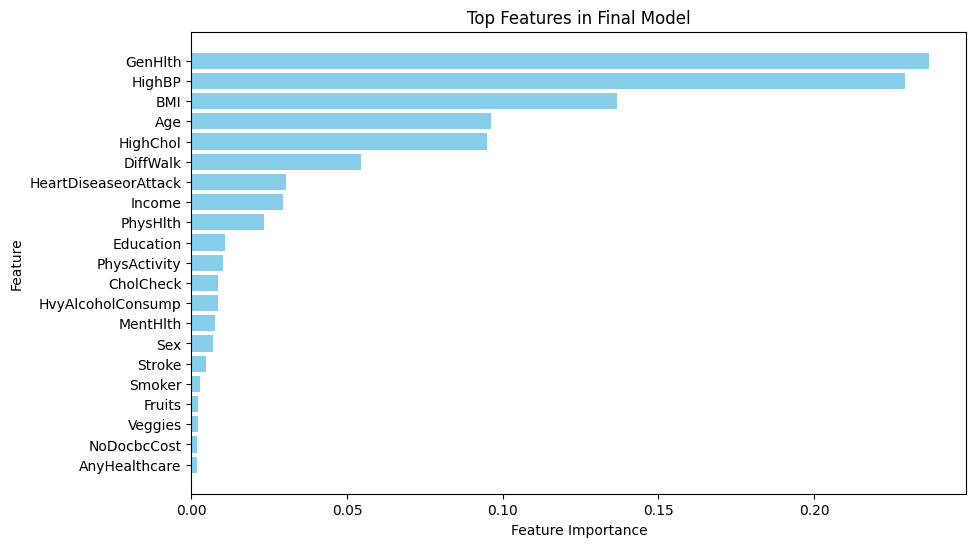

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

final_classifier.fit(X, y.values.ravel())

# Feature importance
feature_importance = final_classifier.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features in Final Model')
plt.gca().invert_yaxis()
plt.show()
